In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('C:\\Users\\Hiwi\\Documents\\week3\\MachineLearningRating_v3.txt', sep='|', dtype={'PostalCode': str})

C:\Users\Hiwi\AppData\Local\Temp\ipykernel_6632\2085389699.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\Hiwi\\Documents\\week3\\MachineLearningRating_v3.txt', sep='|', dtype={'PostalCode': str})


In [4]:
# Initial inspection
print(f"Dataset Dimensions: {df.shape}")
print("\nFirst 5 Rows:")
display(df.head())

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum().sort_values(ascending=False).head(10))

Dataset Dimensions: (1000098, 52)

First 5 Rows:


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0



Data Types:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                   object
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors  

In [5]:
# first i will convert date columns
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'])

# i wil Create essential features
df['VehicleAge'] = df['TransactionMonth'].dt.year - df['RegistrationYear']
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
df['ClaimOccurred'] = np.where(df['TotalClaims'] > 0, 1, 0)

# i wil Handle missing values
df['Cylinders'].fillna(df['Cylinders'].median(), inplace=True)
df['cubiccapacity'].fillna(df['cubiccapacity'].median(), inplace=True)
df['kilowatts'].fillna(df['kilowatts'].median(), inplace=True)

# i wil Clean categoricals
df['Province'] = df['Province'].str.strip().str.upper()
df['VehicleType'] = df['VehicleType'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

C:\Users\Hiwi\AppData\Local\Temp\ipykernel_6632\914108985.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'])


In [6]:
# 1. Overall Portfolio Metrics
print(f"Overall Loss Ratio: {df['LossRatio'].mean():.2%}")
print(f"Claim Frequency: {df['ClaimOccurred'].mean():.2%}")
print(f"Average Claim Severity: {df.loc[df['TotalClaims']>0, 'TotalClaims'].mean():.2f}")
# 1. Overall Portfolio Metrics
print(f"Overall Loss Ratio: {df['LossRatio'].mean():.2%}")
print(f"Claim Frequency: {df['ClaimOccurred'].mean():.2%}")
print(f"Average Claim Severity: {df.loc[df['TotalClaims']>0, 'TotalClaims'].mean():.2f}")
# 2. Key Metrics by Dimension
def analyze_dimension(dimension):
    return df.groupby(dimension).agg(
        Policies=('PolicyID', 'count'),
        LossRatio=('LossRatio', 'mean'),
        ClaimFrequency=('ClaimOccurred', 'mean'),
        AvgPremium=('TotalPremium', 'mean'),
        AvgClaim=('TotalClaims', lambda x: x[x>0].mean())
    ).sort_values('LossRatio', ascending=False)

print("\nBy Province:")
display(analyze_dimension('Province').head())

print("\nBy Vehicle Type:")
display(analyze_dimension('VehicleType').head(10))

print("\nBy Gender:")
display(analyze_dimension('Gender'))

Overall Loss Ratio: nan%
Claim Frequency: 0.28%
Average Claim Severity: 23273.39
Overall Loss Ratio: nan%
Claim Frequency: 0.28%
Average Claim Severity: 23273.39

By Province:


,Policies,LossRatio,ClaimFrequency,AvgPremium,AvgClaim
Province,,,,,
NORTHERN CAPE,6380,0.203831,0.001254,49.617253,11186.313596
EASTERN CAPE,30336,NaN,0.001648,70.546672,27128.533277
FREE STATE,8099,NaN,0.001358,64.373780,32265.661085
GAUTENG,393865,NaN,0.003356,61.071115,22243.878396
KWAZULU-NATAL,169781,NaN,0.002845,77.800695,29609.487473



By Vehicle Type:


,Policies,LossRatio,ClaimFrequency,AvgPremium,AvgClaim
VehicleType,,,,,
Light Commercial,3897,0.543917,0.002053,66.845656,7556.562500
Bus,665,NaN,0.001504,87.586075,7996.535088
Heavy Commercial,7401,NaN,0.002837,62.281835,35736.884921
Medium Commercial,53985,NaN,0.002927,72.663620,26075.106972
Passenger Vehicle,933598,NaN,0.002771,60.670670,22957.374038



By Gender:


,Policies,LossRatio,ClaimFrequency,AvgPremium,AvgClaim
Gender,,,,,
Female,6755,NaN,0.002073,45.074841,17874.721303
Male,42817,NaN,0.002195,36.904566,14858.552294
Not specified,940990,NaN,0.002833,62.915389,23530.667678


C:\Users\Hiwi\anaconda3\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\Hiwi\anaconda3\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


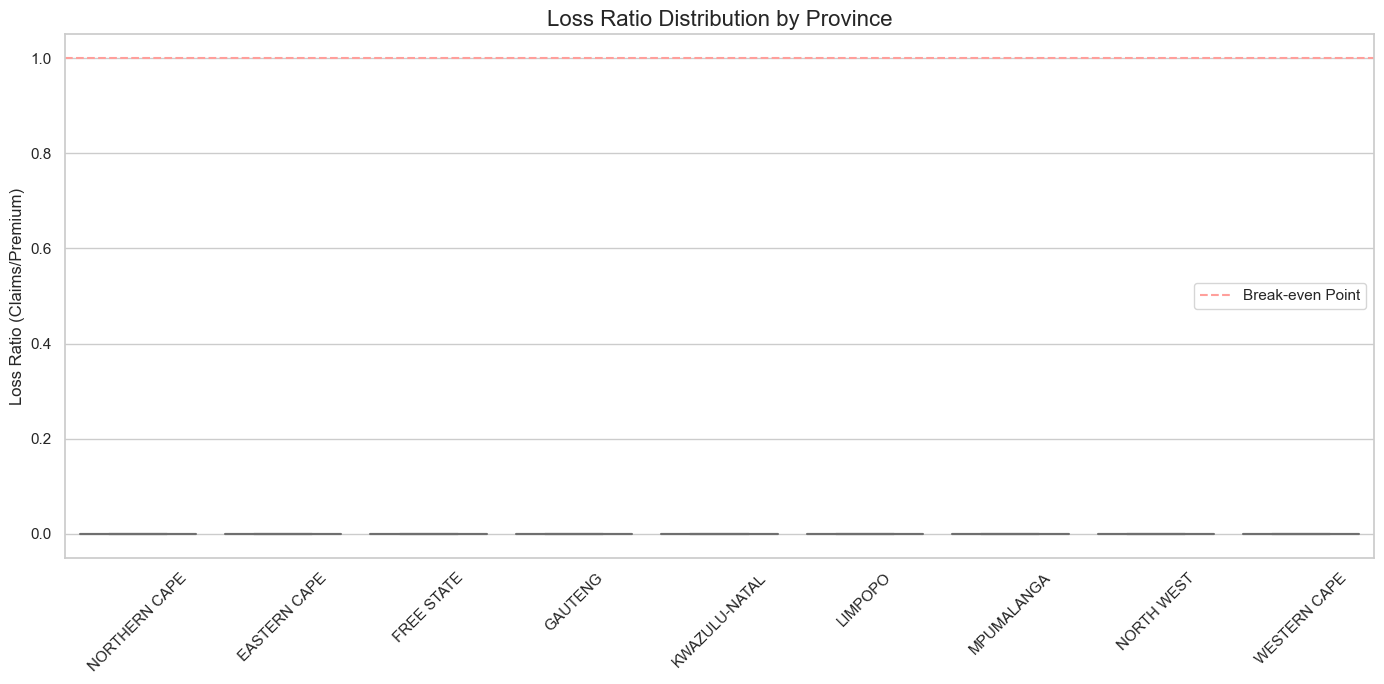

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='pastel')
# 1. Loss Ratio Distribution by Province
plt.figure(figsize=(14, 7))
province_order = df.groupby('Province')['LossRatio'].mean().sort_values(ascending=False).index
sns.boxplot(x='Province', y='LossRatio', data=df, order=province_order, showfliers=False)
plt.axhline(y=1, color='r', linestyle='--', label='Break-even Point')
plt.title('Loss Ratio Distribution by Province', fontsize=16)
plt.ylabel('Loss Ratio (Claims/Premium)')
plt.xlabel('')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('loss_ratio_by_province.png', dpi=300)
plt.show()

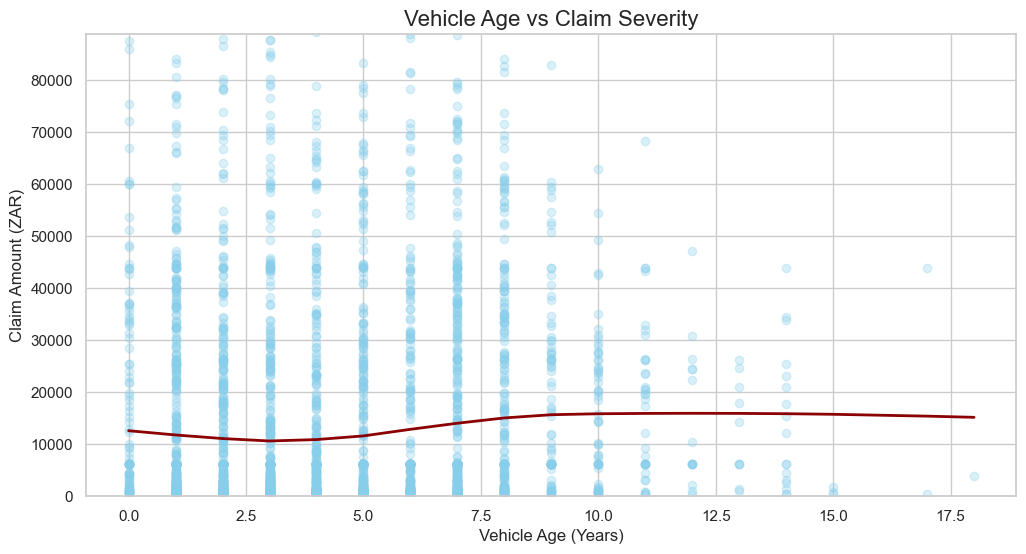

In [8]:
# 2. Vehicle Age vs Claim Severity
plt.figure(figsize=(12, 6))
claim_data = df[df['TotalClaims'] > 0]
sns.regplot(
    x='VehicleAge', 
    y='TotalClaims', 
    data=claim_data,
    lowess=True,
    scatter_kws={'alpha':0.3, 'color':'skyblue'},
    line_kws={'color':'darkred', 'lw':2}
)
plt.title('Vehicle Age vs Claim Severity', fontsize=16)
plt.xlabel('Vehicle Age (Years)')
plt.ylabel('Claim Amount (ZAR)')
plt.ylim(0, claim_data['TotalClaims'].quantile(0.95))
plt.savefig('vehicle_age_vs_claims.png', dpi=300)
plt.show()

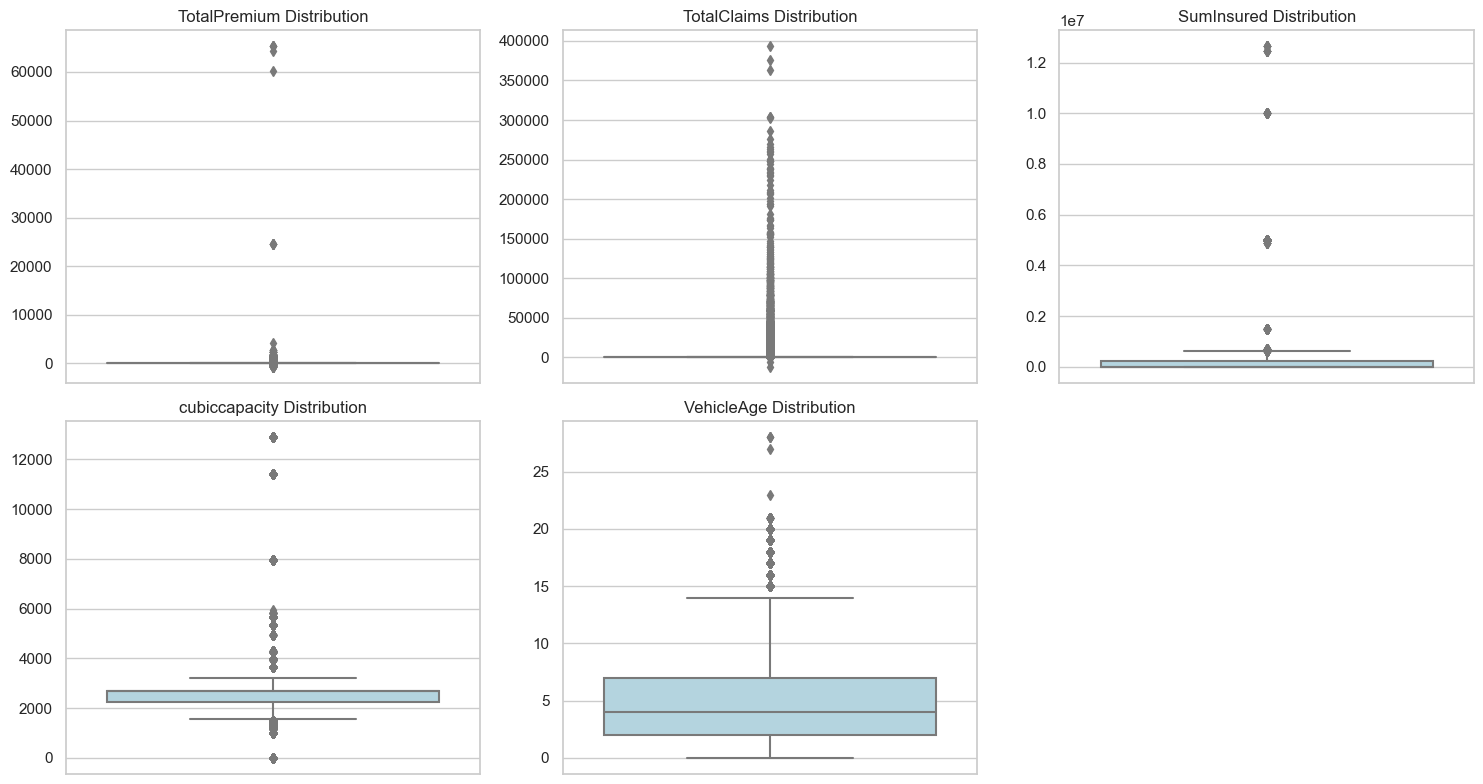

TotalPremium: 209042 outliers (20.90%)
TotalClaims: 2793 outliers (0.28%)
SumInsured: 104294 outliers (10.43%)
cubiccapacity: 56939 outliers (5.69%)
VehicleAge: 7007 outliers (0.70%)


In [10]:
num_features = ['TotalPremium', 'TotalClaims', 'SumInsured', 'cubiccapacity', 'VehicleAge']
plt.figure(figsize=(15, 8))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[feature], color='lightblue')
    plt.title(f'{feature} Distribution')
    plt.ylabel('')
plt.tight_layout()
plt.savefig('outlier_detection.png', dpi=300)
plt.show()

# Quantify outliers
for feature in num_features:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    outliers = df[(df[feature] < q1 - 1.5*iqr) | (df[feature] > q3 + 1.5*iqr)]
    print(f"{feature}: {len(outliers)} outliers ({len(outliers)/len(df):.2%})")
